## Installing Python Dependencies

In [1]:
!pip install -r requirements-dev.txt 

## Define Client Side Methods

In [2]:
import numpy as np
import cv2
import base64
import requests
import matplotlib.pyplot as plt

# Convert image from BGR to RGB
def to_rgb(image_data):
    return cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)

# Encode image from source file
def encode_image_base64(image_src):
    with open(image_src, "rb") as image_file:
        encoded_img = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_img

# Encode image from np array
def encode_image_base64_arr(image, ext='.jpg'):
    _, buffer = cv2.imencode(ext, image)
    return base64.b64encode(buffer).decode('utf-8')

# Decode image to np array
def decode_base64_image(image_data):
    # Decode base64 string back to binary
    image_bytes = base64.b64decode(image_data)
    # Convert binary to numpy array
    np_array = np.frombuffer(image_bytes, np.uint8)
    origin_image = cv2.imdecode(np_array, cv2.IMREAD_UNCHANGED)
    return origin_image

# Resize input image to super resolution target size
def resize_target_super(image_data):
    CROPLINES = 2
    new_width = 1904
    new_height = 1064
    # Create bicubic upsampled image of target size for comparison
    full_bicubic_image = cv2.resize(
        src=image_data[CROPLINES:-CROPLINES, CROPLINES:-CROPLINES, :],
        dsize=(new_width, new_height),
        interpolation=cv2.INTER_CUBIC,
    )
    return cv2.cvtColor(full_bicubic_image, cv2.COLOR_BGR2RGB)

## API Index 

In [3]:
from IPython.core.display import display, HTML

# local test endpoint
# url = "http://127.0.0.1:3000/"
# AWS production endpoint 
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/"

res = requests.get(url)
res.json()
display(HTML(res.json()['html']))

/tmp/ipykernel_268136/3548945831.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


## Image Classification API endpoint

{'img_class': 'white wolf, Arctic wolf, Canis lupus tundrarum'}


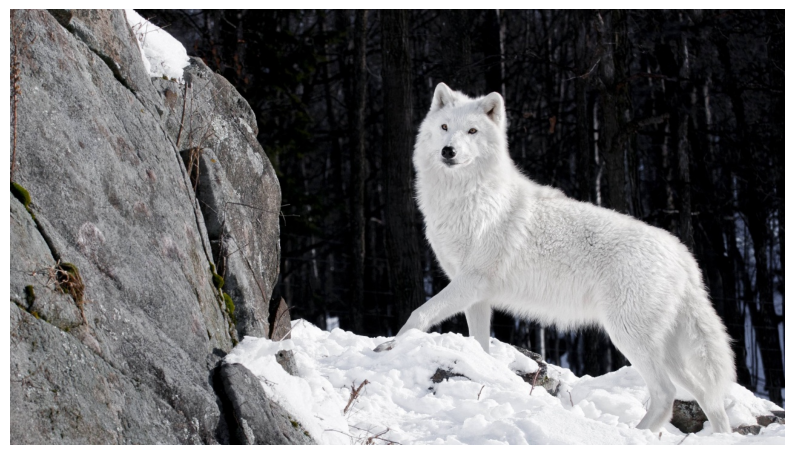

In [4]:
#url = "http://127.0.0.1:3000/classify_image"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/classify_image"
image_source = "images/Image_classification/animal_3.jpg"
# Read image and encode it in Base64 format
encoded_img = encode_image_base64(image_source)
# prepare request payload
payload = {
    'image': encoded_img
}
# send post request to url endpoint
response = requests.post(url, json=payload)
if response.status_code == 200:
    print(response.json())
    # show input image
    image = cv2.imread(image_source)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(to_rgb(image))
    ax.axis('off')
else:
    print(response.text)


## Road Segmentation API endpoint

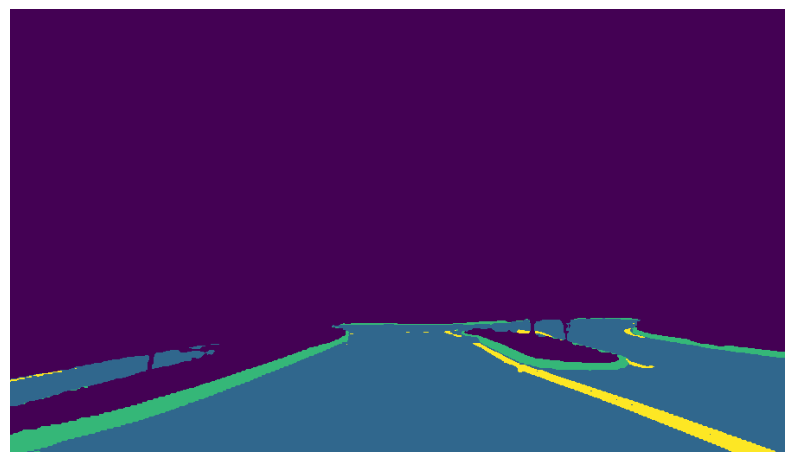

In [5]:
#url = "http://127.0.0.1:3000/road_segmentation"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/road_segmentation"
image_source = "images/road_segmentation/road_1.jpg"
# read image and encode it in Base64 format
encoded_img = encode_image_base64(image_source)
# prepare request payload
payload = {
    'image': encoded_img
}
# send post request to url endpoint
response = requests.post(url, json=payload)
if response.status_code == 200:
    # decode response image result from Base64 to np array
    seg_img = decode_base64_image(response.json()['seg_image'])
    # show result image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(seg_img)
    ax.axis('off')
else:
    print(response.text)

## Image Super Resolution API endpoint

Origin Resolution: 1280 X 720
Super Resolution: 1904 X 1064


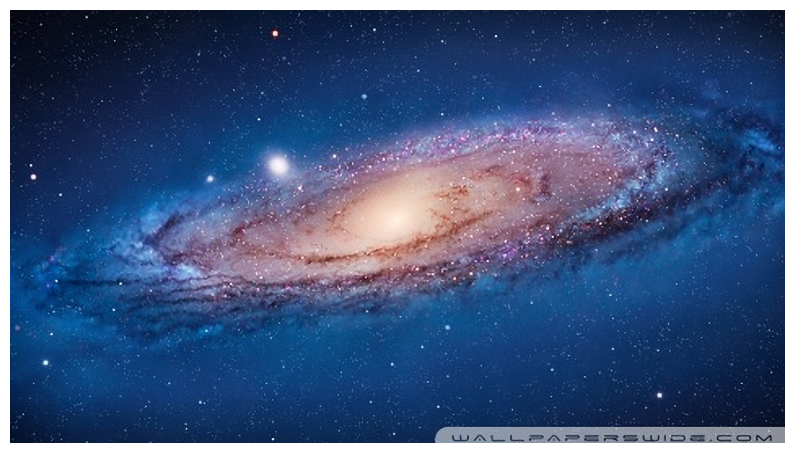

In [6]:
#url = "http://127.0.0.1:3000/super_resolution"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/super_resolution"
image_source = "images/super_resolution/space.jpg"
# read image and encode it in Base64 format
encoded_img = encode_image_base64(image_source)
# prepare request payload
payload = {
    'image': encoded_img
}
# send post request to url endpoint
response = requests.post(url, json=payload)
if response.status_code == 200:
    # decode response image result from Base64 to np array
    super_img = decode_base64_image(response.json()['super'])
    print(f"Origin Resolution: {len(image[0])} X {len(image)}")
    print(f"Super Resolution: {len(super_img[0])} X {len(super_img)}")
    # show result image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(super_img)
    ax.axis('off')
else:
    print(response.text)

## Display Image Comparsion

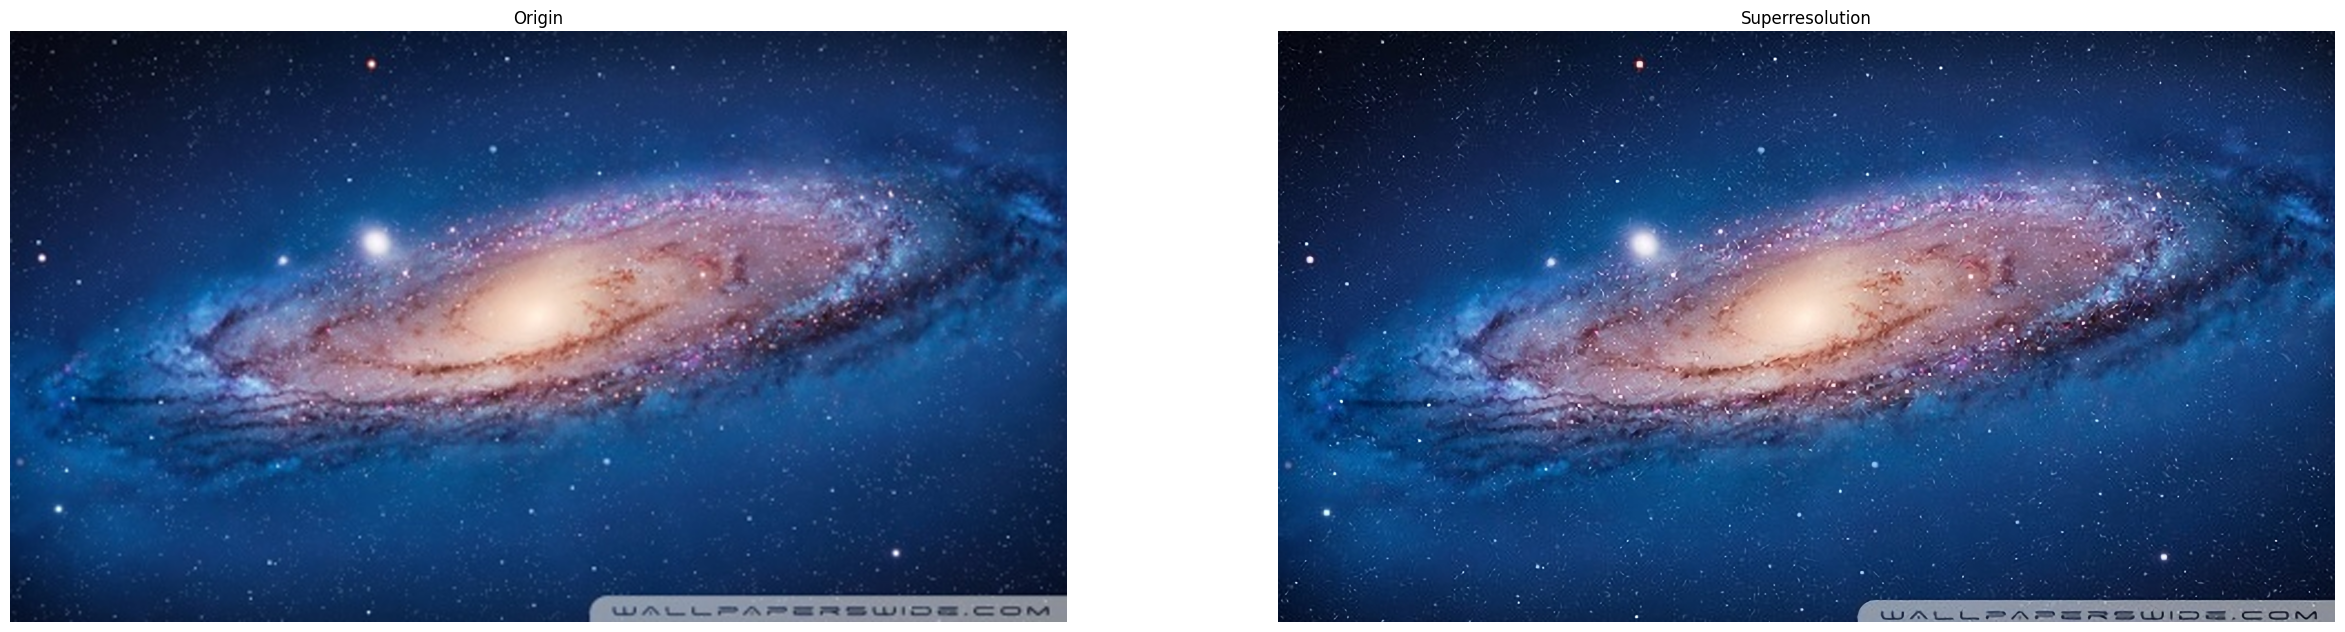

In [7]:
# Read orginal image
image = cv2.imread(image_source)
# Create bicubic upsampled image of target size for comparison
full_bicubic_image = resize_target_super(image)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))
ax[0].imshow(full_bicubic_image)
ax[1].imshow(super_img)
ax[0].set_title("Origin")
ax[1].set_title("Superresolution")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

## Object Detection API endpoint

### Detections Result Info

In [8]:
#url = "http://127.0.0.1:3000/object_detection"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/object_detection"
image_source = "images/object_detection/family-and-dog.jpg"
# read image and encode it in Base64 format
encoded_img = encode_image_base64(image_source)
# prepare request payload
payload = {
    'image': encoded_img
}
# send post request to url endpoint
response = requests.post(url, json=payload)
if response.status_code == 200:
    # print detection coordinates and attributes
    print(response.json())
else:
    print(response.text)

{'detections': [{'box': {'endX': 592, 'endY': 528, 'startX': 444, 'startY': 99}, 'class_id': 15, 'confidence': 0.9971351623535156}, {'box': {'endX': 442, 'endY': 532, 'startX': 292, 'startY': 79}, 'class_id': 15, 'confidence': 0.9969712495803833}, {'box': {'endX': 791, 'endY': 545, 'startX': 652, 'startY': 349}, 'class_id': 10, 'confidence': 0.721081554889679}]}


### Display Detected Objects in Box

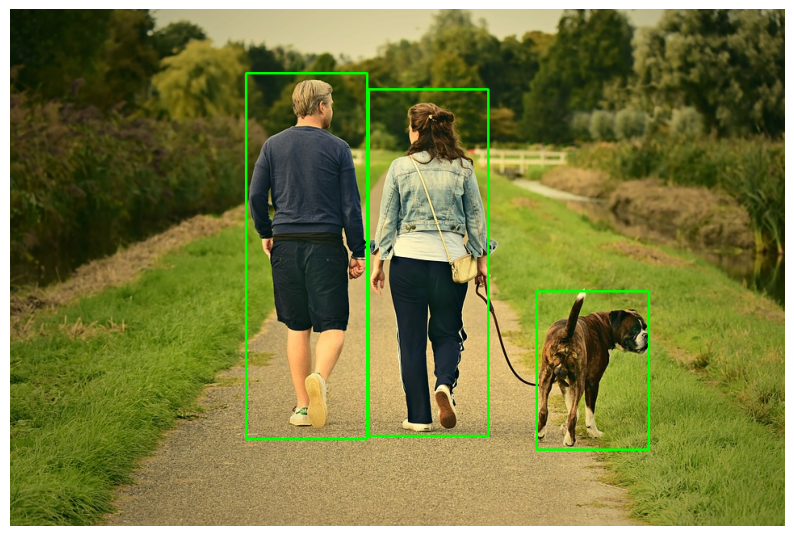

In [9]:
# add return_image flag for response field 
#url = "http://127.0.0.1:3000/object_detection?return_image=true"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/object_detection?return_image=true"
image_source = "images/object_detection/family-and-dog.jpg"
# read image and encode it in Base64 format
encoded_img = encode_image_base64(image_source)
# prepare request payload
payload = {
    'image': encoded_img
}
# send post request to url endpoint
response = requests.post(url, json=payload)
if response.status_code == 200:
    # decode response image result from Base64 to np array
    detect_img = decode_base64_image(response.json()['detection_image'])
    # disply detections objects
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(detect_img)
    ax.axis('off')
else:
    print(response.text)

### Set Confedince Threshold for Detections

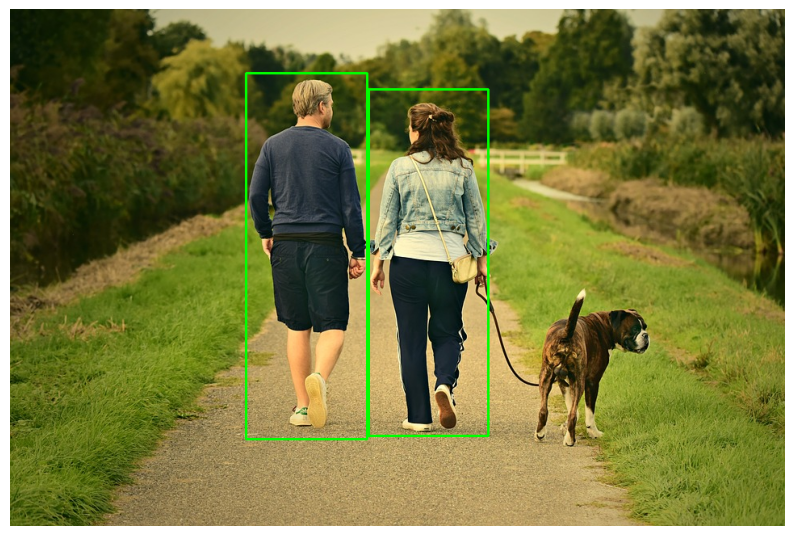

In [10]:
# add return_image flag for response field 
#url = "http://127.0.0.1:3000/object_detection?return_image=true"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/object_detection?return_image=true"
image_source = "images/object_detection/family-and-dog.jpg"
# read image and encode it in Base64 format
encoded_img = encode_image_base64(image_source)
# prepare request payload with confidence threshold paramater
payload = {
    'image': encoded_img,
    'confidence': 0.75
}
# send post request to url endpoint
response = requests.post(url, json=payload)
if response.status_code == 200:
    # decode response image result from Base64 to np array
    detect_img = decode_base64_image(response.json()['detection_image'])
    # disply detections objects
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(detect_img)
    ax.axis('off')
else:
    print(response.text)

### Cropping Detected Objects

In [11]:
#url = "http://127.0.0.1:3000/object_detection"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/object_detection"
image_source = "images/object_detection/dog_rover.jpg"
# read image and encode it in Base64 format
encoded_img = encode_image_base64(image_source)
# prepare request payload
payload = {
    'image': encoded_img,
    'confidence': 0.3
}
# send post request to url endpoint
response = requests.post(url, json=payload)
if response.status_code == 200:
    detections_list = response.json() 
else:
    print(response.text)

# load input image
image = cv2.imread(image_source)

# List to store cropped objects
cropped_objects_list = []
count = 0
for object in detections_list['detections']:
    # get detection coordinates
    object_box = object['box']
    startX = object_box['startX']
    startY = object_box['startY']
    endX = object_box['endX']
    endY = object_box['endY']
    # Crop object
    cropped_obj = image[startY:endY, startX:endX]
    # Add to list (as numpy array)
    cropped_objects_list.append(cropped_obj)
    count += 1

    
print(f"[INFO] Total cropped objects: {len(cropped_objects_list)}")

[INFO] Total cropped objects: 2


### Display Cropped Objects

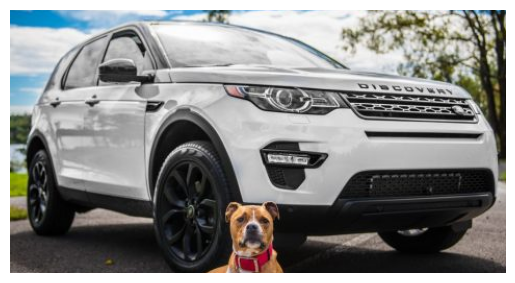

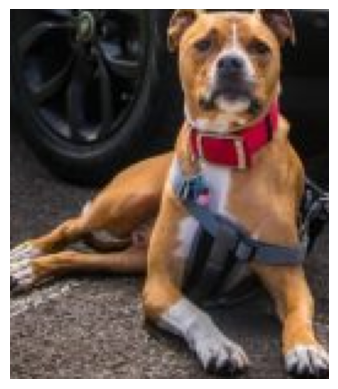

In [12]:
for obj in cropped_objects_list:
    rgb_obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb_obj)
    plt.axis('off')

## Model Stacking 

### Integrate Model Output into Another Model as Input for complex workflow

Object Detection Cropped Objects result into Image Classification Model

{'img_class': 'racer, race car, racing car'}
{'img_class': 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier'}


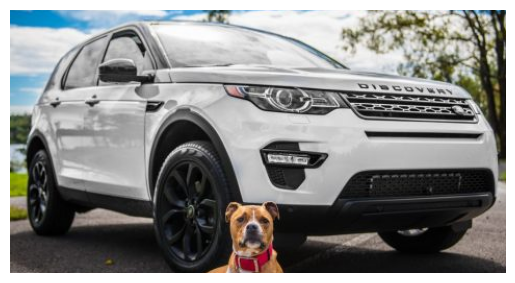

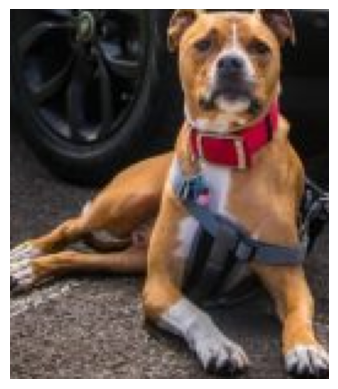

In [13]:
#url = "http://127.0.0.1:3000/classify_image"
url = "https://x42ws63lp5.execute-api.us-east-1.amazonaws.com/Prod/classify_image"
for obj in cropped_objects_list:
    # encode object np array in Base64 format
    encoded_img = encode_image_base64_arr(obj)
    # prepare request payload
    payload = {
        'image': encoded_img,
    }
    # send post request to url endpoint
    response = requests.post(url, json=payload)
    if response.status_code == 200:
        print(response.json())
        # show cropped object
        plt.figure()
        plt.imshow(to_rgb(obj))
        plt.axis('off')
    else:
        print(response.text)